In [1]:
MAIN = '/Users/jordancarson/PyCharmProjects/AmazonKaggle-MLCapstone'
TRAIN_PATH = 'resources/train-jpg/'
TRAIN_LABELS = 'resources/train_v2.csv'

In [22]:
import numpy as np
import pandas as pd
import os
import gc
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import matplotlib.image as pimg
import seaborn as sns
import random
from PIL import Image
from tqdm import tqdm
# from src.utillities.utility import plot_pictures
import cv2
%matplotlib inline

In [23]:
MAIN = '/Users/jordancarson/PyCharmProjects/AmazonKaggle-MLCapstone'
TRAIN_PATH = 'resources/train-jpg/'
TRAIN_LABELS = 'resources/train_v2.csv'

In [24]:
df_labels = pd.read_csv(os.path.join(MAIN, TRAIN_LABELS))
# df_train = df_labels.tags.str.get_dummies(' ')
# df_train.insert(0, 'image_name', df_labels.image_name)
# df_labels = read_file(MAIN, TRAIN_LABELS, filetype='csv')
# print(df_labels.head(10))

labels = df_labels.tags.values
labels_list = []
for lbl in labels:
    labels_list.extend(lbl.split(' '))
labels_set = set(labels_list)
# print(labels_set)

df_train = df_labels.tags.str.get_dummies(' ')
df_train.insert(0, 'image_name', df_labels.image_name)
print(df_train.head(10))

df_labels.head()

  image_name  agriculture  artisinal_mine  bare_ground  blooming  blow_down  \
0    train_0            0               0            0         0          0   
1    train_1            1               0            0         0          0   
2    train_2            0               0            0         0          0   
3    train_3            0               0            0         0          0   
4    train_4            1               0            0         0          0   
5    train_5            0               0            0         0          0   
6    train_6            1               0            0         0          0   
7    train_7            0               0            0         0          0   
8    train_8            1               0            0         0          0   
9    train_9            1               0            0         0          0   

   clear  cloudy  conventional_mine  cultivation  habitation  haze  \
0      0       0                  0            0           0

,image_name,tags
0,train_0,haze primary
1,train_1,agriculture clear primary water
2,train_2,clear primary
3,train_3,clear primary
4,train_4,agriculture clear habitation primary road


In [25]:
df_train[list(labels_set)].sum().sort_values()
# we can see that the majority of the labels are in primary, clear & agriculture

blow_down               98
conventional_mine      100
slash_burn             209
blooming               332
artisinal_mine         339
selective_logging      340
bare_ground            862
cloudy                2089
haze                  2697
habitation            3660
cultivation           4477
partly_cloudy         7261
water                 7411
road                  8071
agriculture          12315
clear                28431
primary              37513
dtype: int64

In [27]:
x_train, y_train = [], []

label_map = \
        {'blow_down'        : 0,
         'bare_ground'      : 1,
         'conventional_mine': 2,
         'blooming'         : 3,
         'cultivation'      : 4,
         'artisinal_mine'   : 5,
         'haze'             : 6,
         'primary'          : 7,
         'slash_burn'       : 8,
         'habitation'       : 9,
         'clear'            : 10,
         'road'             : 11,
         'selective_logging': 12,
         'partly_cloudy'    : 13,
         'agriculture'      : 14,
         'water'            : 15,
         'cloudy'           : 16}

for f, tags in tqdm(df_labels.values[:18000], miniters=1000):
    train_img = cv2.imread(os.path.join(MAIN, TRAIN_PATH) + '{}.jpg'.format(f))
    targets = np.zeros(17)
    for t in tags.split(' '):
        targets[label_map[t]] = 1
# train_img = cv2.resize(train_img, self.resize_image)
    x_train.append(cv2.resize(train_img, (64, 64)))
    y_train.append(targets)




100%|██████████| 18000/18000 [01:20<00:00, 222.45it/s]


In [34]:
img_sample = os.path.join(MAIN, TRAIN_PATH) + 'train_1.jpg'

sample = cv2.imread(img_sample)

In [53]:
rows, cols, channel = sample.shape

M = cv2.getRotationMatrix2D((cols / 2, rows / 2), 180, 1)
dst = cv2.warpAffine(sample, M, (cols, rows))



TypeError: bad argument type for built-in operation

In [52]:
labels_list = []
for lbl in labels:
    labels_list.extend(lbl.split(' '))
labels_set = set(labels_list)
print(labels_set)

{'water', 'primary', 'cloudy', 'road', 'clear', 'cultivation', 'partly_cloudy', 'slash_burn', 'haze', 'selective_logging', 'conventional_mine', 'bare_ground', 'blooming', 'habitation', 'agriculture', 'artisinal_mine', 'blow_down'}


In [9]:
df_train = df_labels.tags.str.get_dummies(' ')
df_train.insert(0, 'image_name', df_labels.image_name)
# print(df_train.head(10))

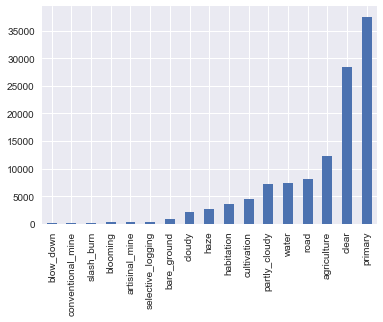

In [10]:
df_train[list(labels_set)].sum().sort_values().plot(kind='bar')

In [14]:
ordered_labels = df_train[list(labels_set)].sum().sort_values(ascending=False).index
ordered_labels

Index(['primary', 'clear', 'agriculture', 'road', 'water', 'partly_cloudy',
       'cultivation', 'habitation', 'haze', 'cloudy', 'bare_ground',
       'selective_logging', 'artisinal_mine', 'blooming', 'slash_burn',
       'conventional_mine', 'blow_down'],
      dtype='object')

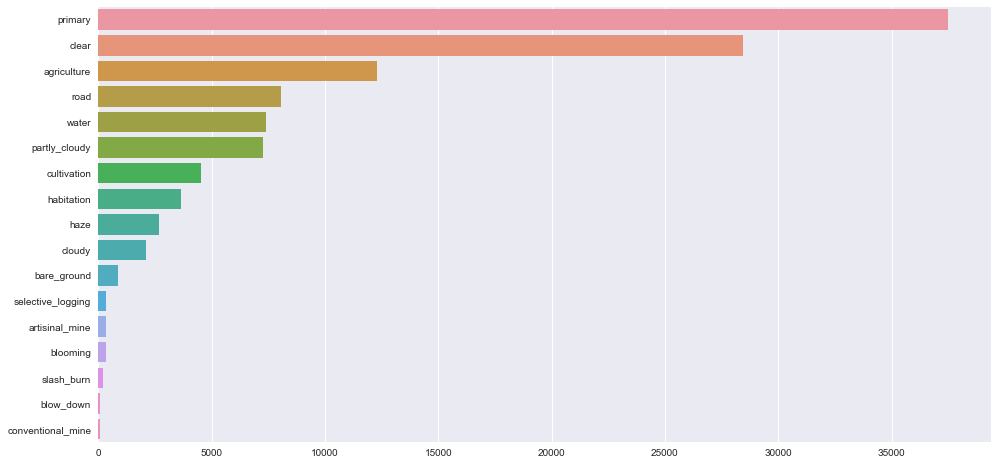

In [16]:

# Histogram of label instances
labels_s = pd.Series(labels_list).value_counts() # To sort them by count
fig, ax = plt.subplots(figsize=(16, 8))
sns.barplot(x=labels_s, y=labels_s.index)

In [17]:
df_percentage = df_train[ordered_labels].sum() / df_train[ordered_labels].count() * 100.0


In [18]:
df_percentage.sort_values()

blow_down             0.242101
conventional_mine     0.247042
slash_burn            0.516317
blooming              0.820178
artisinal_mine        0.837471
selective_logging     0.839942
bare_ground           2.129499
cloudy                5.160701
haze                  6.662714
habitation            9.041725
cultivation          11.060056
partly_cloudy        17.937696
water                18.308259
road                 19.938734
agriculture          30.423182
clear                70.236419
primary              92.672744
dtype: float64

None


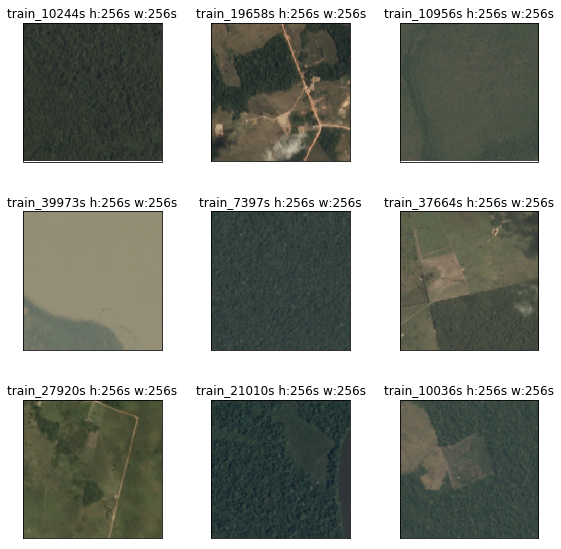

In [80]:
print(plot_pictures('primary', df_train, os.path.join(MAIN, TRAIN_PATH)))

None


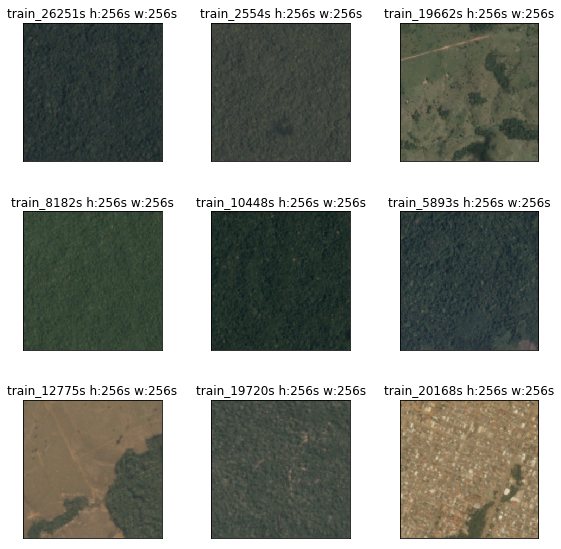

In [81]:
print(plot_pictures('clear', df_train, os.path.join(MAIN, TRAIN_PATH)))

None


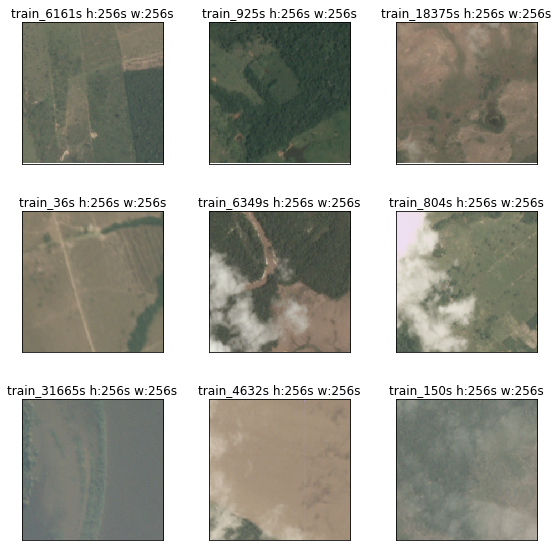

In [67]:
print(plot_pictures('agriculture', df_train, os.path.join(MAIN, TRAIN_PATH)))

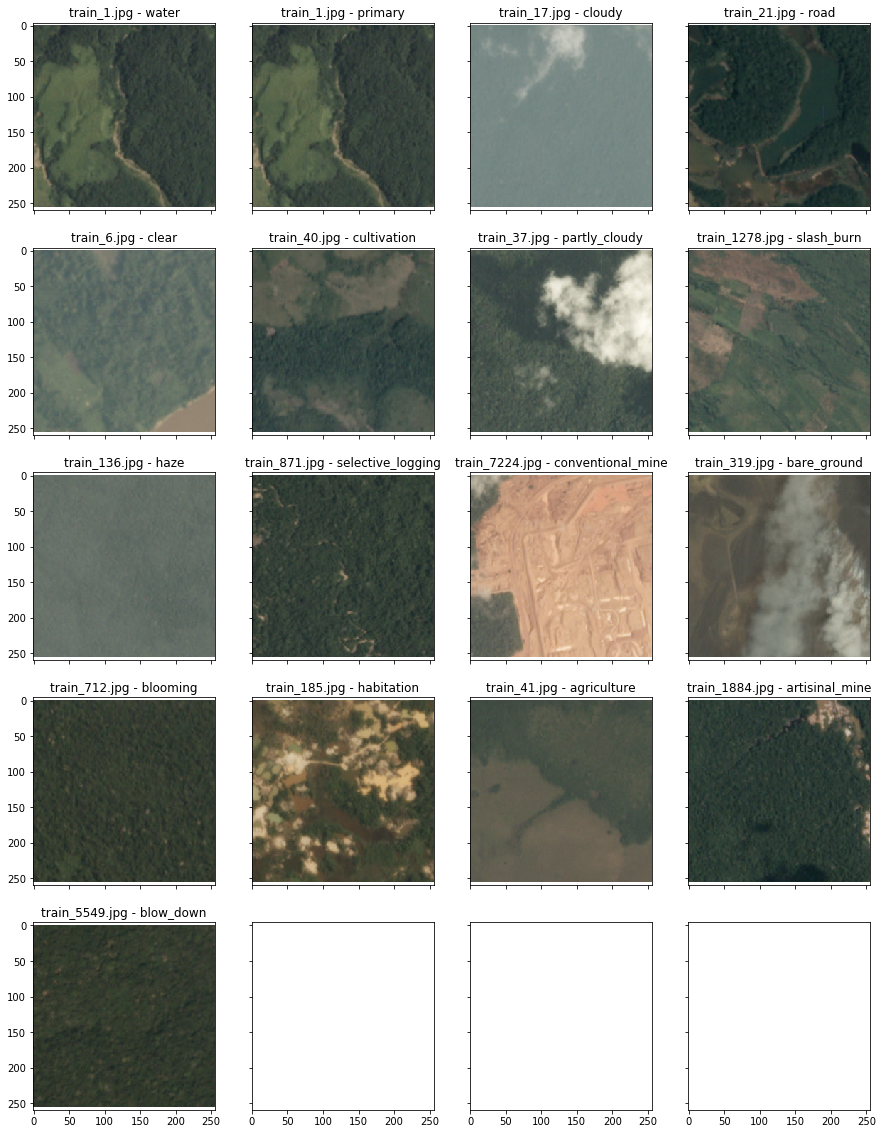

In [82]:
# images_title = [df_labels[df_labels['tags'].str.contains(label)].iloc[i]['image_name'] + '.jpg' 
#                 for i, label in enumerate(labels_set)]

# plt.rc('axes', grid=False)
# _, axs = plt.subplots(5, 4, sharex='col', sharey='row', figsize=(15, 20))
# axs = axs.ravel()

# for i, (image_name, label) in enumerate(zip(images_title, labels_set)):
#     img = pimg.imread(os.path.join(MAIN, TRAIN_PATH) + '/' + image_name)
#     axs[i].imshow(img)
#     axs[i].set_title('{} - {}'.format(image_name, label))







In [83]:
# Define hyperparameters of our neural network and resize the images

resize_image = (64, 64) # resize to 64 by 64
validation_split_size = 0.3
batch_size = 128


NameError: name 'data_helper' is not defined